<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/main/CNN/SignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"tomgoodman","key":"5ea3292300b7c04f71789a2f2d34a0be"}'}

In [ ]:
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-09 08:39:14           2296  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1330  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1013  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            479  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip sign-language-mnist.zip

In [ ]:
import pandas as pd


In [ ]:
train_data=pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')

In [ ]:
print(train_data.shape)

(27455, 785)


In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_data.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,182,182,181,181,182,181,181,181,181,179,178,178,176,177,178,159,47,30,39,180,182,183,183,183,183,185,184,185,183,184,...,97,97,95,90,92,101,125,160,191,202,213,215,96,88,109,216,208,207,203,178,151,112,87,80,76,80,86,97,102,103,108,132,170,194,214,203,197,205,209,215


In [ ]:
import numpy as np

In [ ]:
X_train=train_data.loc[:,'pixel1':].values

In [ ]:
y_train=train_data['label'].values

In [ ]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(27455,)


In [ ]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(27455, 784)


In [ ]:
from math import ceil
import matplotlib.pyplot as plt


In [ ]:
def show_sample(sample_num):
  idx=np.random.randint(low=0,high=X_train.shape[0],size=sample_num)
  images=np.empty(shape=(sample_num,28,28))
  count=0
  plt.figure(figsize=(15,15))
  for i in idx:
    images[count,:,:]=np.array(X_train[i]).reshape((28,28))
    plt.subplot(sample_num/5,5,count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    count +=1

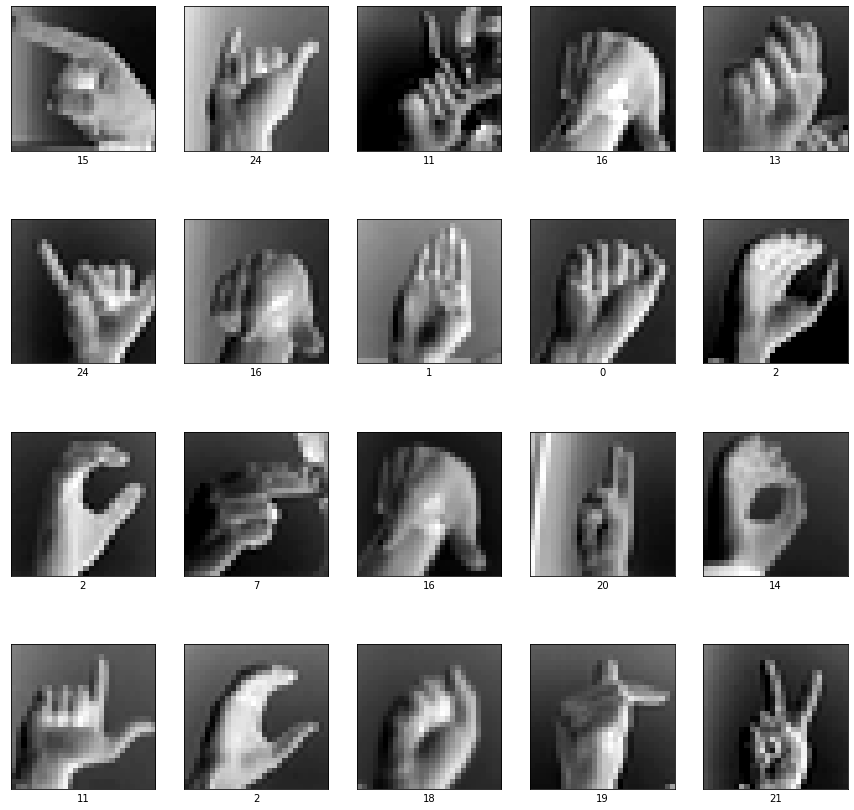

In [ ]:
show_sample(20)

In [ ]:
lables=set(train_data['label'].values)
print(lables)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


In [ ]:
test_data=pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
print(test_data.shape)

(7172, 785)


In [ ]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
X_test=test_data.loc[:,'pixel1':].values

In [ ]:
y_test=test_data['label'].values

# The first approach : Our CNN architecture

In [ ]:
from tensorflow.keras.layers import Conv2D,BatchNormalization,Flatten,Dropout,MaxPooling2D,Dense,Input
from tensorflow.keras.models import Model

In [ ]:
def biuid_simple_model(input_dim,K):
  i = Input(shape=input_dim)

  x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)

  # x = GlobalMaxPooling2D()(x)
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(576, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(K, activation='softmax')(x)

  model = Model(i, x)
  return model


In [ ]:
X_train=X_train.reshape((-1,28,28,1))/255
X_test=X_test.reshape((-1,28,28,1))/255

In [ ]:
model=biuid_simple_model(X_train[0].shape,K=25)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        1849

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
858/858 [==============================] - 209s 242ms/step - loss: 1.8576 - accuracy: 0.4894 - val_loss: 4.8509 - val_accuracy: 0.1465
Epoch 2/50
858/858 [==============================] - 203s 237ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 6.6408 - val_accuracy: 0.0990
Epoch 3/50
858/858 [==============================] - 204s 237ms/step - loss: 0.0308 - accuracy: 0.9895 - val_loss: 14.0814 - val_accuracy: 0.0229
Epoch 4/50
858/858 [==============================] - 207s 241ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 1.9113 - val_accuracy: 0.5622
Epoch 5/50
858/858 [==============================] - 199s 232ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.2482 - val_accuracy: 0.9562
Epoch 6/50
858/858 [==============================] - 199s 232ms/step - loss: 0.0216 - accuracy: 0.9951 - val_loss: 8.3943 - val_accuracy: 0.0531
Epoch 7/50
858/858 [==============================] - 211s 246ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 12.7067

# A simpler model

In [ ]:
def biuid_simple_model2(input_dim,K):
  i = Input(shape=input_dim)

  x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # x = Dropout(0.2)(x)

  # x = GlobalMaxPooling2D()(x)
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(576, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(K, activation='softmax')(x)

  model = Model(i, x)
  return model

In [ ]:
model2=biuid_simple_model2(X_train[0].shape,K=25)

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0     

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
858/858 [==============================] - 67s 78ms/step - loss: 0.1957 - accuracy: 0.9400 - val_loss: 0.2498 - val_accuracy: 0.9109
Epoch 2/30
858/858 [==============================] - 67s 78ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.2240 - val_accuracy: 0.9501
Epoch 3/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.4914 - val_accuracy: 0.9010
Epoch 4/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.6280 - val_accuracy: 0.8947
Epoch 5/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0350 - accuracy: 0.9914 - val_loss: 0.2592 - val_accuracy: 0.9540
Epoch 6/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0155 - accuracy: 0.9961 - val_loss: 0.6167 - val_accuracy: 0.9066
Epoch 7/30
858/858 [==============================] - 66s 77ms/step - loss: 0.0273 - accuracy: 0.9942 - val_loss: 0.4111 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

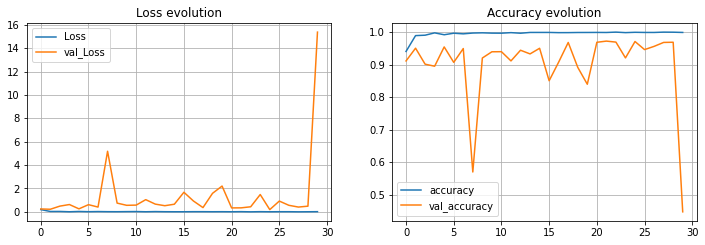

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

# Using tape

In [ ]:
def get_batch(x,y,batch_size):
  idx=np.random.choice(x.shape[0], batch_size)
  in_batch=[x[i] for i in idx]
  out_batch=[y[i] for i in idx]
  x_batch = np.reshape(in_batch, [batch_size, x.shape[1],x.shape[2],x.shape[3]])
  y_batch = np.reshape(out_batch, [batch_size])
  return x_batch, y_batch


In [ ]:
x_batch, y_batch = get_batch(X_train,y_train,10)
print(x_batch.shape)
print(y_batch.shape)

(10, 28, 28, 1)
(10,)


In [ ]:
print(x_batch[4])
print(y_batch[4])

In [ ]:
from tensorflow.keras.optimizers import Adam


def build_model3(input_dim):
  i = Input(shape=input_dim)
  x=Conv2D(32, (3, 3), activation='relu')(i)
  x=MaxPooling2D(pool_size = (2, 2))(x)
  x=Dropout(0.25)(x)

  x=Conv2D(64, (3, 3), activation='relu')(x)
  x=MaxPooling2D(pool_size = (2, 2))(x)
  x=Dropout(0.25)(x)

  x=Conv2D(128, (3, 3), activation='relu')(x)
  x=MaxPooling2D(pool_size = (2, 2))(x)
  x=Dropout(0.25)(x)

  x=Flatten()(x)

  x=Dense(units = 512, activation = 'relu')(x)
  x=Dropout(0.25)(x)
  x=Dense(units = 25, activation = 'softmax')(x)
  model=Model(i,x)
  return model

In [ ]:
model3 = build_model3(X_train[0].shape)

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0   

In [ ]:
x, y = get_batch(X_train,y_train,batch_size=32)
pred = model3(x)

In [ ]:
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       (32, 28, 28, 1)  # (batch_size, sequence_length)
Prediction shape:  (32, 25) # (batch_size, sequence_length, vocab_size)


In [ ]:
import tensorflow as tf
def compute_loss(label,logits):
  l=tf.keras.losses.sparse_categorical_crossentropy(label,logits,from_logits=True)
  return l

In [ ]:
example_batch_loss = compute_loss(y, pred)
print("Prediction shape: ", pred.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (32, 25)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       3.2168334


In [ ]:
import os

num_training_iterations = 20 
batch_size = 50 
#learning_rate = 5e-3  

# Checkpoint location: 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

In [ ]:

class PeriodicPlotter:
  def __init__(self, sec, xlabel='', ylabel='', scale=None):

    self.xlabel = xlabel
    self.ylabel = ylabel
    self.sec = sec
    self.scale = scale

    self.tic = time.time()

  def plot(self, data):
    if time.time() - self.tic > self.sec:
      plt.cla()

      if self.scale is None:
        plt.plot(data)
      elif self.scale == 'semilogx':
        plt.semilogx(data)
      elif self.scale == 'semilogy':
        plt.semilogy(data)
      elif self.scale == 'loglog':
        plt.loglog(data)
      else:
        raise ValueError("unrecognized parameter scale {}".format(self.scale))

      plt.xlabel(self.xlabel); plt.ylabel(self.ylabel)
      ipythondisplay.clear_output(wait=True)
      ipythondisplay.display(plt.gcf())

      self.tic = time.time()


In [ ]:
from sklearn.utils import shuffle
from math import floor

def get_batch2(x,y,batch_size):
  x, y = shuffle(x, y)
  batchs=[]
  for i in range(floor(x.shape[0]/batch_size)):
    in_batch=x[i:i+batch_size]
    out_batch=y[i:i+batch_size]
    batchs.append((in_batch,out_batch))
  if x.shape[0]% batch_size != 0:
    start=floor(x.shape[0]/batch_size)
    in_batch=x[start*batch_size:]
    out_batch=y[start*batch_size:]
    batchs.append((in_batch,out_batch))
  return batchs

In [ ]:
b=get_batch2(X_train,y_train,50)

In [ ]:
print(b[549][1])
print(X_train.shape[0])

[12  0  7 23 12]
27455


In [ ]:
model3 = build_model3(X_train[0].shape)

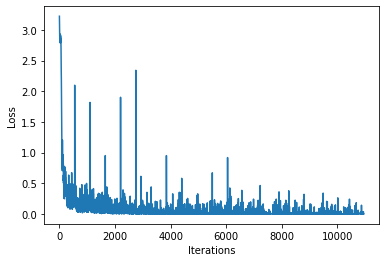

100%|██████████| 20/20 [07:30<00:00, 22.54s/it]


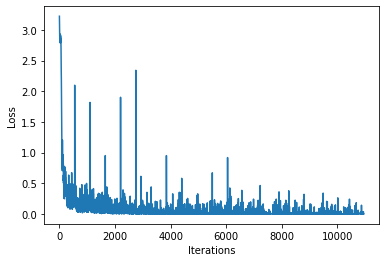

In [ ]:
import time
from tqdm import tqdm
import functools
from IPython import display as ipythondisplay

optimizer = tf.keras.optimizers.Adam()

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_hat=model3(x)
    lose=compute_loss(y,y_hat)
    grads=tape.gradient(lose,model3.trainable_variables)
    optimizer.apply_gradients(zip(grads, model3.trainable_variables))
  return lose

history = []
plotter=PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for iter in tqdm(range(num_training_iterations)):
  batchs = get_batch2(X_train, y_train, batch_size)
  count=0
  for (x_batch,y_batch) in batchs:
    loss = train_step(x_batch, y_batch)
    history.append(loss.numpy().mean())
    plotter.plot(history)
    count +=1
    if count % 100 == 0:     
      model3.save_weights(checkpoint_prefix)
    
model3.save_weights(checkpoint_prefix)

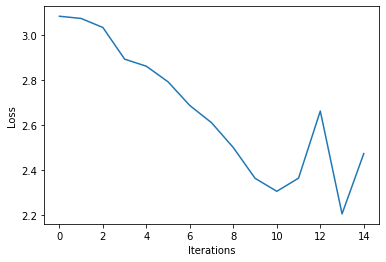

 75%|███████▌  | 15/20 [04:09<01:23, 16.74s/it]

KeyboardInterrupt: ignored

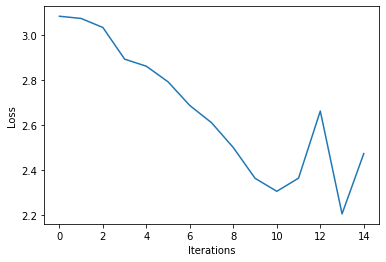

In [ ]:
import time
from tqdm import tqdm
import functools
from IPython import display as ipythondisplay

num_training_iterations = 20
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_hat=model3(x)
    lose=compute_loss(y,y_hat)
    grads=tape.gradient(lose,model3.trainable_variables)
    optimizer.apply_gradients(zip(grads, model3.trainable_variables))
  return lose

history = []
plotter=PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for iter in tqdm(range(num_training_iterations)):
    loss = train_step(X_train, y_train)
    history.append(loss.numpy().mean())
    plotter.plot(history)
    if iter % 5 == 0:     
      model3.save_weights(checkpoint_prefix)
    
model3.save_weights(checkpoint_prefix)

In [ ]:
model3 = build_model3(X_train[0].shape)

model3.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
#model.build(tf.TensorShape([1, None]))

model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0   

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ac=model3.evaluate(X_test,y_test)

225/225 [==============================] - 2s 9ms/step - loss: 3.1199 - accuracy: 0.1249


simple model with this arcitecture

In [ ]:
model4 = build_model3(X_train[0].shape)
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 64)          0   

In [ ]:
r2 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
858/858 [==============================] - 32s 37ms/step - loss: 2.4638 - accuracy: 0.2449 - val_loss: 0.5640 - val_accuracy: 0.8146
Epoch 2/30
858/858 [==============================] - 31s 36ms/step - loss: 0.5267 - accuracy: 0.8169 - val_loss: 0.2907 - val_accuracy: 0.9046
Epoch 3/30
858/858 [==============================] - 31s 36ms/step - loss: 0.2647 - accuracy: 0.9108 - val_loss: 0.1716 - val_accuracy: 0.9586
Epoch 4/30
858/858 [==============================] - 31s 36ms/step - loss: 0.1500 - accuracy: 0.9495 - val_loss: 0.1551 - val_accuracy: 0.9463
Epoch 5/30
858/858 [==============================] - 31s 36ms/step - loss: 0.1132 - accuracy: 0.9614 - val_loss: 0.1370 - val_accuracy: 0.9519
Epoch 6/30
858/858 [==============================] - 31s 36ms/step - loss: 0.0955 - accuracy: 0.9689 - val_loss: 0.1192 - val_accuracy: 0.9617
Epoch 7/30
858/858 [==============================] - 31s 37ms/step - loss: 0.0765 - accuracy: 0.9737 - val_loss: 0.1371 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

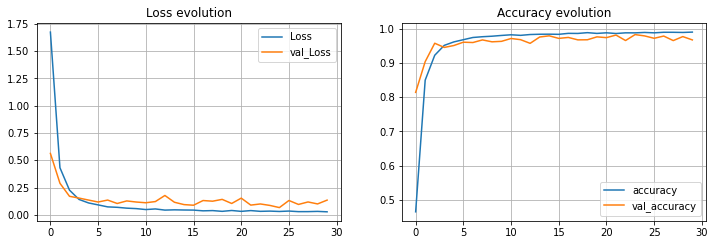

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r2.history['loss'], label='Loss')
plt.plot(r2.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r2.history['accuracy'], label='accuracy')
plt.plot(r2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

# simple model with batch and data agmuntation

In [ ]:
model5 = build_model3(X_train[0].shape)
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0     

In [ ]:
model6 = biuid_simple_model(X_train[0].shape,25)
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

#datagen.fit(X_train)

epochs=20

r3 = model6.fit(datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32, epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/20
857/857 [==============================] - 171s 199ms/step - loss: 0.6821 - accuracy: 0.7750 - val_loss: 1.4313 - val_accuracy: 0.7044
Epoch 2/20
857/857 [==============================] - 172s 200ms/step - loss: 0.1614 - accuracy: 0.9467 - val_loss: 0.0839 - val_accuracy: 0.9690
Epoch 3/20
857/857 [==============================] - 173s 201ms/step - loss: 0.1063 - accuracy: 0.9670 - val_loss: 1.4494 - val_accuracy: 0.7225
Epoch 4/20
857/857 [==============================] - 172s 200ms/step - loss: 0.0959 - accuracy: 0.9712 - val_loss: 0.4915 - val_accuracy: 0.8696
Epoch 5/20
857/857 [==============================] - 172s 200ms/step - loss: 0.0793 - accuracy: 0.9771 - val_loss: 0.0265 - val_accuracy: 0.9891
Epoch 6/20
857/857 [==============================] - 175s 204ms/step - loss: 0.0650 - accuracy: 0.9820 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 7/20
857/857 [==============================] - 171s 200ms/step - loss: 0.0599 - accuracy: 0.9846 - val_loss: 0.1037 -

Text(0.5, 1.0, 'Accuracy evolution')

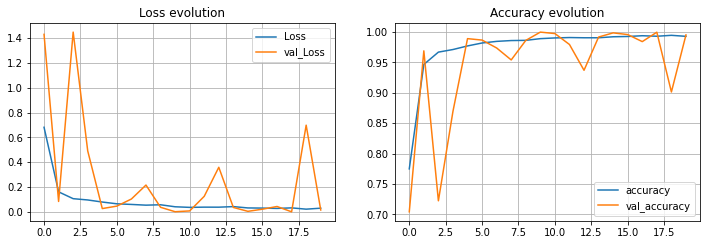

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r3.history['loss'], label='Loss')
plt.plot(r3.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r3.history['accuracy'], label='accuracy')
plt.plot(r3.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
model7 = build_model3(X_train[0].shape)
model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

#datagen.fit(X_train)

epochs=20

r4 = model7.fit(datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32, epochs=epochs,validation_data=(X_test, y_test))

Epoch 1/20
857/857 [==============================] - 35s 41ms/step - loss: 3.0671 - accuracy: 0.0744 - val_loss: 1.6779 - val_accuracy: 0.3975
Epoch 2/20
857/857 [==============================] - 34s 40ms/step - loss: 1.8685 - accuracy: 0.3858 - val_loss: 0.6974 - val_accuracy: 0.7890
Epoch 3/20
857/857 [==============================] - 34s 40ms/step - loss: 1.3004 - accuracy: 0.5588 - val_loss: 0.4707 - val_accuracy: 0.8381
Epoch 4/20
857/857 [==============================] - 34s 40ms/step - loss: 1.0565 - accuracy: 0.6388 - val_loss: 0.3632 - val_accuracy: 0.8892
Epoch 5/20
857/857 [==============================] - 34s 40ms/step - loss: 0.9206 - accuracy: 0.6791 - val_loss: 0.2993 - val_accuracy: 0.8928
Epoch 6/20
857/857 [==============================] - 34s 40ms/step - loss: 0.8429 - accuracy: 0.7072 - val_loss: 0.2163 - val_accuracy: 0.9328
Epoch 7/20
857/857 [==============================] - 34s 40ms/step - loss: 0.7810 - accuracy: 0.7273 - val_loss: 0.1977 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

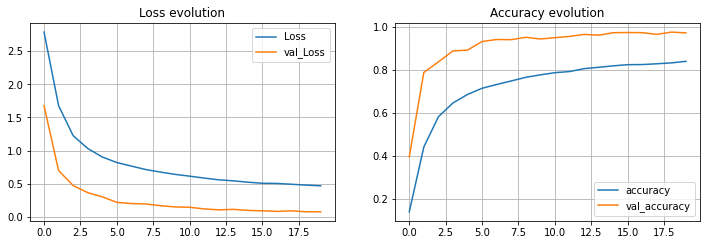

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r4.history['loss'], label='Loss')
plt.plot(r4.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r4.history['accuracy'], label='accuracy')
plt.plot(r4.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')